# Pymaceuticals Inc.
---

### Analysis

1. **Treatment Effectiveness**:
   - The **Capomulin** and **Ramicane** regimens had the lowest average tumor volumes, suggesting they were more effective in reducing tumor size compared to other regimens like **Infubinol** and **Ceftamin**.

2. **Outliers**:
   - **Infubinol** exhibited potential outliers in its tumor volume distribution, indicating variability in its effectiveness. This could suggest the need for further investigation into its performance and factors causing these anomalies.

3. **Mouse Weight vs. Tumor Volume (Capomulin)**:
   - There is a strong positive correlation (~0.84) between mouse weight and average tumor volume for mice treated with Capomulin. This suggests that heavier mice tend to have larger tumor volumes.

4. **Sex Distribution**:
   - The study included a nearly equal distribution of male and female mice, ensuring that gender-related biases in treatment outcomes are minimized.

5. **Data Cleaning**:
   - One duplicate Mouse ID (**g989**) was identified and removed to ensure the dataset was accurate and free from errors.

6. **Tumor Progression Over Time**:
   - In a single mouse treated with Capomulin (e.g., Mouse ID: `b128`), tumor volume consistently decreased over time, further supporting the effectiveness of the treatment.



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")
merged_data.head()


# Display the data table for preview
merged_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice
num_mice = merged_data["Mouse ID"].nunique()
print(f"The total number of unique mice in the dataset is: {num_mice}")


The total number of unique mice in the dataset is: 249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_mice = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mouse_ids = duplicate_mice["Mouse ID"].unique()
print(f"The duplicate Mouse IDs are: {duplicate_mouse_ids}")


The duplicate Mouse IDs are: ['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID
duplicate_mouse_data = merged_data.loc[merged_data["Mouse ID"].isin(duplicate_mouse_ids)]
duplicate_mouse_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
# Identify the Mouse ID to drop
mouse_to_drop = duplicate_mouse_ids[0]  # Assuming only one duplicate ID; adjust if needed

# Drop all data associated with the duplicate Mouse ID
cleaned_data = merged_data[merged_data["Mouse ID"] != mouse_to_drop]

# Display the number of unique Mouse IDs in the cleaned data
print(f"The total number of unique mice after cleaning is: {cleaned_data['Mouse ID'].nunique()}")


The total number of unique mice after cleaning is: 248


In [6]:
# Checking the number of mice in the clean DataFrame
num_mice_cleaned = cleaned_data["Mouse ID"].nunique()
print(f"The total number of unique mice in the cleaned dataset is: {num_mice_cleaned}")


The total number of unique mice in the cleaned dataset is: 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and statistical methods to calculate the required metrics
summary_stats = merged_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean="mean",
    Median="median",
    Variance="var",
    Std_Dev="std",
    SEM="sem"
)

# Convert the results into a DataFrame
summary_stats_df = pd.DataFrame(summary_stats)

# Display the summary statistics DataFrame
summary_stats_df


,Mean,Median,Variance,Std_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_agg = merged_data.groupby("Drug Regimen").agg(
    Mean=("Tumor Volume (mm3)", "mean"),
    Median=("Tumor Volume (mm3)", "median"),
    Variance=("Tumor Volume (mm3)", "var"),
    Std_Dev=("Tumor Volume (mm3)", "std"),
    SEM=("Tumor Volume (mm3)", "sem")
)

# Display the summary statistics DataFrame
summary_stats_agg


,Mean,Median,Variance,Std_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

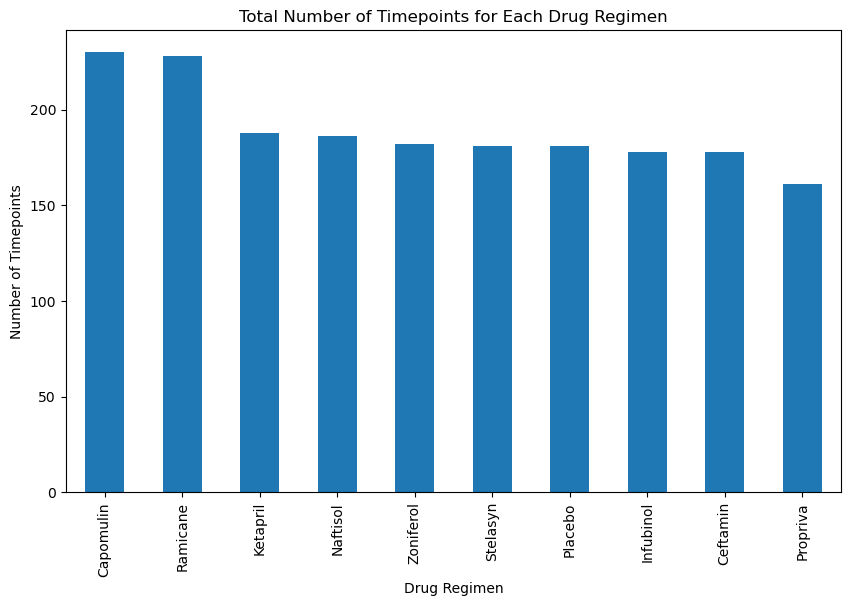

In [22]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas
timepoints_per_regimen = merged_data["Drug Regimen"].value_counts()

# Create the bar plot using Pandas
timepoints_per_regimen.plot(
    kind="bar",
    title="Total Number of Timepoints for Each Drug Regimen",
    ylabel="Number of Timepoints",
    xlabel="Drug Regimen",
    figsize=(10, 6)
)

# Show the plot
plt.show()


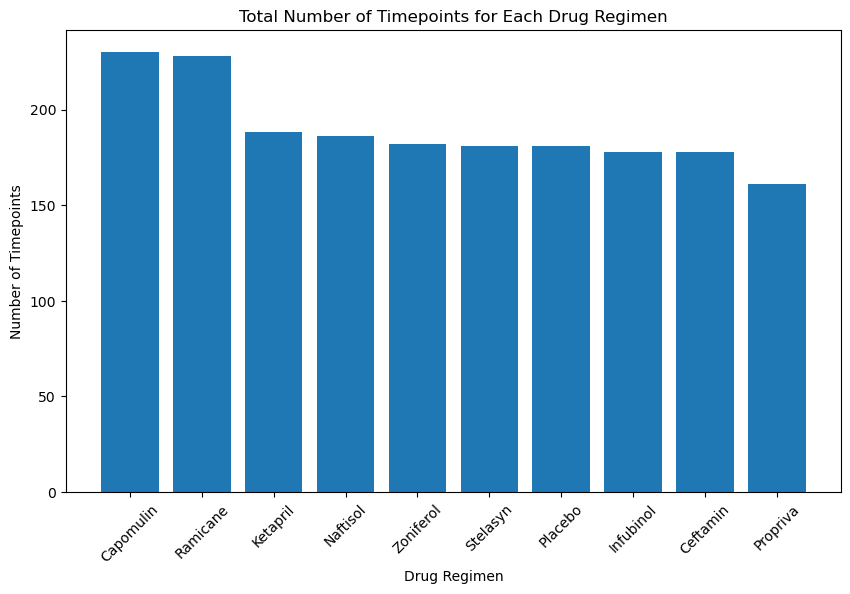

In [24]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot
timepoints_per_regimen = merged_data["Drug Regimen"].value_counts()

# Create the bar plot using pyplot
plt.figure(figsize=(10, 6))
plt.bar(timepoints_per_regimen.index, timepoints_per_regimen.values)
plt.title("Total Number of Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Show the plot
plt.show()


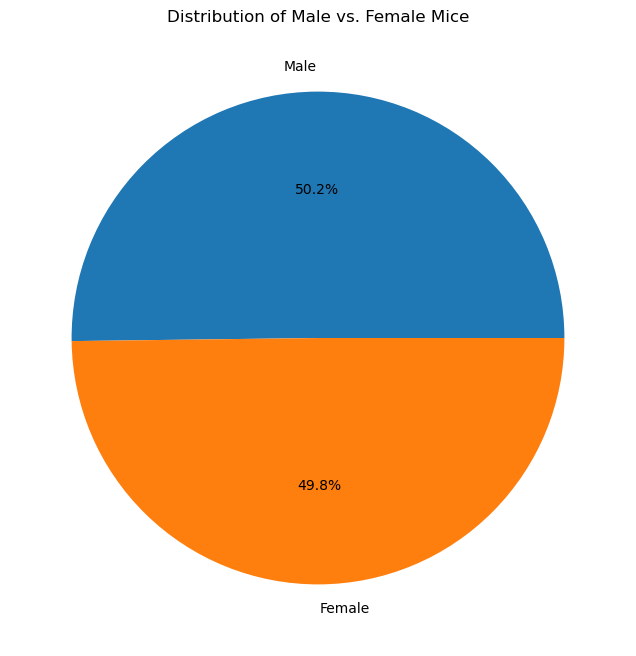

In [20]:
# Get the unique mice with their gender
sex_distribution = merged_data.drop_duplicates(subset="Mouse ID")["Sex"].value_counts()

# Make the pie chart using Pandas
sex_distribution.plot(
    kind="pie",
    autopct="%1.1f%%",
    title="Distribution of Male vs. Female Mice",
    figsize=(8, 8)
)

# Remove the y-axis label for a cleaner look
plt.ylabel("")

# Show the plot
plt.show()


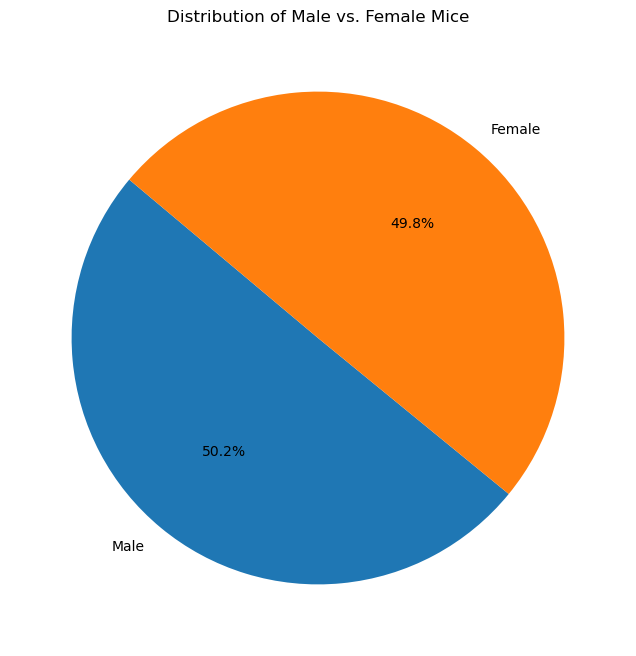

In [12]:
# Get the unique mice with their gender
sex_distribution = merged_data.drop_duplicates(subset="Mouse ID")["Sex"].value_counts()

# Make the pie chart using pyplot
plt.figure(figsize=(8, 8))
plt.pie(
    sex_distribution.values,
    labels=sex_distribution.index,
    autopct="%1.1f%%",
    startangle=140
)
plt.title("Distribution of Male vs. Female Mice")

# Show the plot
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = merged_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, merged_data, on=["Mouse ID", "Timepoint"])

# Display the first few rows of the resulting DataFrame
final_tumor_volume.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    tumor_volumes.append(treatment_data)
    
    # Calculate the quartiles and IQR
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using the IQR
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # Print results
    print(f"{treatment}:\n")
    print(f"Lower Quartile: {lowerq}")
    print(f"Upper Quartile: {upperq}")
    print(f"IQR: {iqr}")
    print(f"Potential outliers: {outliers.tolist()}\n")


Capomulin:

Lower Quartile: 32.37735684
Upper Quartile: 40.1592203
IQR: 7.781863460000004
Potential outliers: []

Ramicane:

Lower Quartile: 31.56046955
Upper Quartile: 40.65900627
IQR: 9.098536719999998
Potential outliers: []

Infubinol:

Lower Quartile: 54.04860769
Upper Quartile: 65.52574285
IQR: 11.477135160000003
Potential outliers: [36.3213458]

Ceftamin:

Lower Quartile: 48.72207785
Upper Quartile: 64.29983003
IQR: 15.577752179999997
Potential outliers: []



/var/folders/sg/782v2f5n29sfywh5hpghhtdc0000gn/T/ipykernel_11345/1824020310.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_volumes, labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])


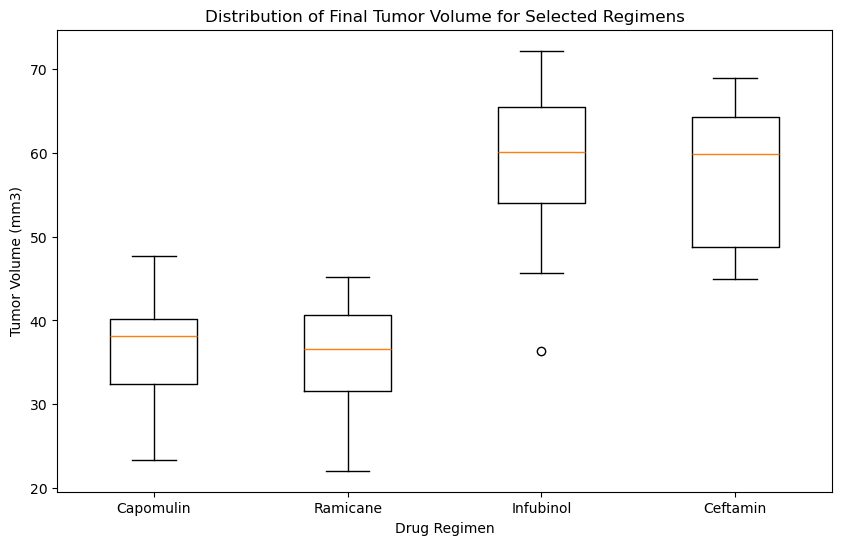

In [ ]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group
plt.figure(figsize=(10, 6))

# Create the box plot using the collected tumor volumes
plt.boxplot(tumor_volumes, tick_labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

# Add a title and labels
plt.title("Distribution of Final Tumor Volume for Selected Regimens")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")

# Show the plot
plt.show()


## Line and Scatter Plots

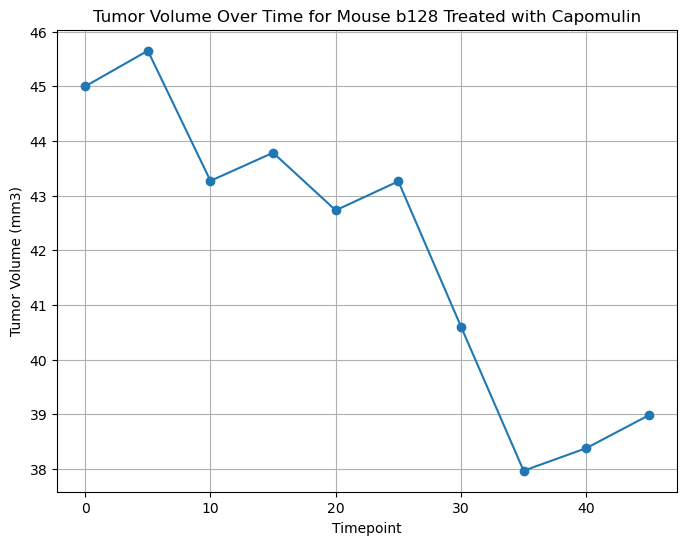

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Select a single mouse treated with Capomulin
mouse_id = "b128"  # Replace with any Capomulin-treated Mouse ID from the dataset
capomulin_mouse_data = merged_data.loc[merged_data["Mouse ID"] == mouse_id]

# Create the line plot
plt.figure(figsize=(8, 6))
plt.plot(capomulin_mouse_data["Timepoint"], capomulin_mouse_data["Tumor Volume (mm3)"], marker="o")

# Add labels, title, and grid
plt.title(f"Tumor Volume Over Time for Mouse {mouse_id} Treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()

# Show the plot
plt.show()


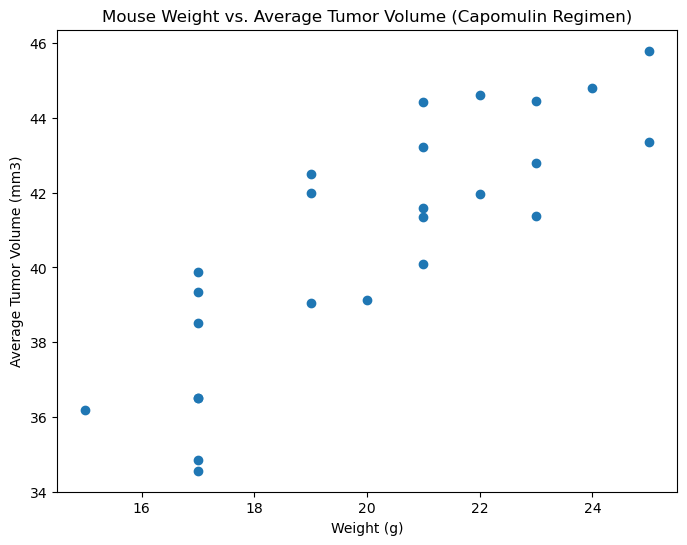

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter the data for the Capomulin regimen
capomulin_data = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Get the corresponding mouse weights
mouse_weights = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(mouse_weights, average_tumor_volume)

# Add labels and title
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the plot
plt.show()


## Correlation and Regression

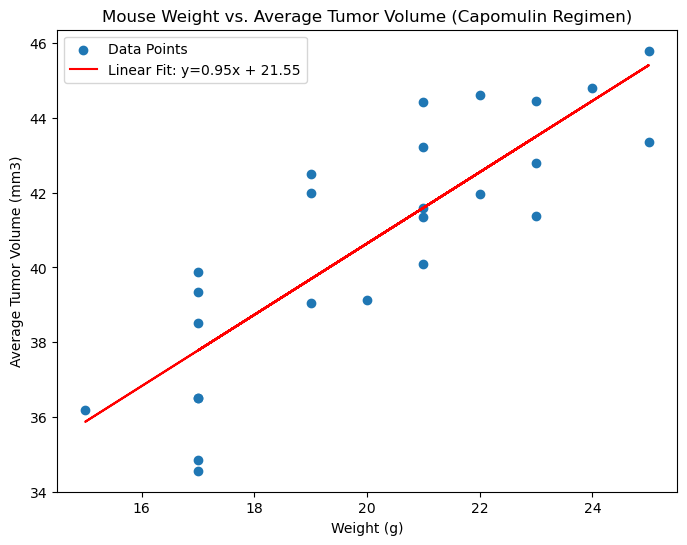

The correlation coefficient between mouse weight and average tumor volume is 0.84.


In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import linregress

# Filter the data for the Capomulin regimen
capomulin_data = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Get the corresponding mouse weights
mouse_weights = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weights, average_tumor_volume)

# Generate regression line
regression_line = slope * mouse_weights + intercept

# Create scatter plot with regression line
plt.figure(figsize=(8, 6))
plt.scatter(mouse_weights, average_tumor_volume, label="Data Points")
plt.plot(mouse_weights, regression_line, color="red", label=f"Linear Fit: y={slope:.2f}x + {intercept:.2f}")

# Add labels, title, and legend
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.legend()

# Show the plot
plt.show()

# Display correlation coefficient
print(f"The correlation coefficient between mouse weight and average tumor volume is {rvalue:.2f}.")
